<a href="https://colab.research.google.com/github/shiqisim/Final-Project/blob/main/final_project_actual_implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning and Neural Networks: Deep Learning on a public dataset


#1. Introduction


Breast cancer is a common disease that has affected numerous women around the world. It is often not easy to detect if one has breast cancer in the early stages as there may not be any symptoms. Hence, it is important for early detection to occur to prevent further deaths. This disease happens when there is lining cells of the ducts or lobules in the glandular tissue of the breast [1]. This type of cancer has a high treatment rate if detected early and before the cancerous cells spread to the other parts of the body.

In 2020, 2.3 million women were diagnosed with breast cancer and there were 685000 deaths around the world. This reflects how common this type of cancer is as it could occur at any age after puberty for women. Males could contract breast cancer too, but such cases are significantly lesser than the probability of a female contracting it. Statistics have shown how the survival rate of breast cancer after diagnosis for at least five years are more than 90% in high income countries, 66% in India and 40% in South Africa [2]. As a result, this project seeks to develop a deep learning model to assist the lower income countries with detecting the risk of one contracting breast cancer and to get treatment earlier. Healthcare systems should also be put in place in managing breast cancer cases through ‘referral pathways [2]' to ease the complications surrounding it.

The aim of this project is to develop a deep learning model that explores multiple algorithms for predicting whether one is at a risk of getting breast cancer and to implement the best algorithm. For example, original models that uses the idea of Convolutional Neural Networks (CNN) and Artificial Neural Network (ANN) are used. Subsequently, it should also classify and detect the breast ultrasound images for predicting breast cancer, as well as perform evaluation on the different machine learning models.
The objectives would be to develop an original model with suitable depth, deliver a clear and concise analysis that is well documented, as well as an evaluation on the different models created.

#2. Defining the problem and assembling a dataset

This dataset called 'Breast Ultrasound Images Dataset [3]' includes the medical images of breast cancer from ultrasound scans and it is categorised into three classes. They are malignant, benign and normal images. This data was collected in 2018 and the patients are aged between 25 and 75 years old and there are 600 person in total. The dataset consists of 780 images with an average image size of 500*500 pixels and in PNG format. The ground truth images are presented with original images. Hence, I would like to explore and perform segmentation of the ultrasound images to predict whether one has breast cancer. The data availability is sufficient for me to conduct segmentation of the images based on the three classes. The ground truth accuracy was also verified by the radiologists from Baheya and the incorrect annotation was fixed.

Thhis dataset is a multi-class segmentation with single-label classification. Thus, for the last-layer activation, I would be using 'softmax' and 'categorical_crossentropy' for the loss function. The input features would be all the images from the benign, normal and malignant class and the output would be the predictions of image that has been converted from categorical to numerical data using the one hot encoding technique.


#3. Choosing a measure of success

The metric of success for this model would be precision, recall, AUROC (Area Under the Receiver Operating Characteristics), balanced accuracy score and f1-score.

Precision is the measurement of the correctly classified positive results over the total classified positive results which includes correct and incorrect results [4]. Recall is the 'ratio between the numbers of Positive samples correctly classified as Positive to the total number of Positive samples [4].' It is used to 'measure the model's ability to detect positive samples [4].' Precision and recall is widely used as a performance metric for classification models in machine learning [4].

'ROC is a probability curve and AUC represents the degree or measure of separability [5].' It measures how well the 'model is capable of distinguishing between classes [5]' The higher the AUC, the higher the probability of the model is at predicting the correct classes. 'An excellent model has AUC near to the 1 which means it has a good measure of separability [5].' 'A poor model has an AUC near 0 which means it has the worst measure of separability [5].' 'ROC analysis does not have any bias toward models that perform well on the minority class at the expense of the majority class—a property that is quite attractive when dealing with imbalanced data [6].' Hence, this is a good metric to use for evaluation for imbalanced datasets.

Additionally, the balanced accuracy score is chosen as it is widely used in multiclass classification and issues of an imbalanced dataset. The definition for it is calculated as the average of recall in each class. Lastly, the f1-measure is selected as a metric in this project as it can 'combine both precision and recall into a single measure that captures both properties [7].' 'The F1-measure, which weights precision and recall equally, is the variant most often used when learning from imbalanced data [7].' Hence, this shows that this metric is useful for this imbalanced dataset and would aid me in the evaluation process. To determine the results of the metric, the best result would be defined as 1.0 and the worst would be 0.0.

#4. Deciding on an evaluation protocol

The evaluation protocol that I have chosen for this project would be the K-fold cross-validation. For K-fold cross-validation, 'the procedure has a single parameter called k that refers to the number of groups that a given data sample is to be split into [8].' I have chosen this method as it is stated that it is 'simple to understand and because it generally results in a less biased or less optimistic estimate of the model skill than other methods, such as a simple train/test split [8].' In general, out of the groups, one would be used as test set whilst the remaining would be the train set. 'The model is trained on the training set and scored on the test set [9].'

The advantage of using the K-fold cross validation is that it is useful for data that is limited and prevents overfitting. The disadvantage, however, would be that it is computationally intensive as it will train and test the model continuously. For hold-out validation, the advantage would be that it has lesser computation costs, good for large datasets and building of first model. The disadvantage would be that it is highly dependent on the train and test split unlike the cross-validation methods which can train on 'multiple train-test splits [10].'

Hence, I have selected the K-fold cross-validation for this project as it is suitable for datasets that are not that large and would prevent overfitting.


#5. Preparing your data

In [ ]:
pip install scikit-learn==1.1.2

In [ ]:
!pip install scikeras

In [ ]:
import tensorflow as tf
tf.version.VERSION

'2.13.0'

In [ ]:
import numpy as np
import pandas as pd

# mount gdrive, required for downloaded dataset (or sql data dump)
import os
from google.colab import drive
drive.mount("/content/drive")

import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import itertools
import cv2
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

from tensorflow import keras
from keras.utils import load_img, img_to_array
from keras.models import Sequential, clone_model
from tensorflow.keras.models import Model
from keras.layers import Conv2D
from keras.layers import MaxPooling2D,AveragePooling2D,BatchNormalization
from keras.layers import Dense,Activation
from keras.layers import Flatten,Dropout,SpatialDropout2D,AveragePooling2D,GlobalAveragePooling2D
from keras.layers import LSTM,Bidirectional,Reshape
from keras.optimizers import SGD
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.metrics import Precision, Recall, AUC

from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.utils.class_weight import compute_class_weight
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold

from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,roc_auc_score

from PIL import Image

device_name = tf.test.gpu_device_name()
if len(device_name) > 0:
    print("Found GPU at: {}".format(device_name))
else:
    device_name = "/device:CPU:0"
    print("No GPU, using {}.".format(device_name))

SEED = 270

tf.random.set_seed(SEED)
np.random.seed(SEED)

import warnings
warnings.filterwarnings('ignore')


Mounted at /content/drive
No GPU, using /device:CPU:0.


In [ ]:
# project name
os.environ["PROJECT_NAME"] = "breast-cancer"

# set folder paths in gdrive for the coursework
os.environ["CODER_HOME"] = "/content"
os.environ["PROJECTS"] = os.getenv("CODER_HOME") + "/project"
os.environ["PROJECT_HOME"] = os.getenv("PROJECTS") + "/" + os.getenv("PROJECT_NAME")
os.environ["DATA_PATH"] = os.getenv("PROJECT_HOME") + "/data"
os.environ["SCRIPT_PATH"] = os.getenv("PROJECT_HOME") + "/scripts"

# heirachically create project folders in local if not exist
!mkdir -p $CODER_HOME
!mkdir -p $PROJECTS
!mkdir -p $PROJECT_HOME
!mkdir -p $DATA_PATH
!mkdir -p $SCRIPT_PATH

# set folder paths on gdrive for the coursework
os.environ["GD_COURSE_HOME"] = "/content/drive/MyDrive/data"
os.environ["GD_PROJECT_HOME"] = os.getenv("GD_COURSE_HOME") + "/" + os.getenv("PROJECT_NAME")
os.environ["GD_DATA_PATH"] = os.getenv("GD_PROJECT_HOME") + "/data"
os.environ["GD_SCRIPT_PATH"] = os.getenv("GD_PROJECT_HOME") + "/scripts"

# heirachically create project folders in gdrive if not exist
!mkdir -p $GD_COURSE_HOME
!mkdir -p $GD_PROJECT_HOME
!mkdir -p $GD_DATA_PATH
!mkdir -p $GD_SCRIPT_PATH

In [ ]:
!ls -d $PROJECT_HOME/*

/content/project/breast-cancer/data  /content/project/breast-cancer/scripts


In [ ]:
# defining file path
filePath = "/content/drive/MyDrive/data/breast-cancer/Dataset_BUSI_with_GT"

# Get the list of image files
image_files = []
labels = []

# Iterate over the directories
for class_name in ['benign', 'malignant', 'normal']:
    class_path = os.path.join(filePath, class_name)
    for filename in os.listdir(class_path):
        image_path = os.path.join(class_path, filename)
        image_files.append(image_path)
        labels.append(class_name)

# Convert labels to numerical values
from tensorflow.keras.utils import to_categorical

# Convert labels to numerical values
label_encoder =
labels = label_encoder.fit_trLabelEncoder()ansform(labels)

# Convert labels to one-hot encoded format
labels = to_categorical(labels)


In [ ]:
print(labels.shape)
print(len(image_files))

(1578, 3)
1578


In [ ]:
# splitting into testing and training set
X_train, X_test, y_train, y_test = train_test_split(image_files, labels, test_size=0.2, random_state=42, stratify = labels)

In [ ]:
print(len(X_train),len(y_train))
print(len(X_test),len(y_test))

1262 1262
316 316


In [ ]:
# function to load and preprocess the images
def load_preprocess_image(image_path):
    image = Image.open(image_path)
    image = image.resize((150, 150))
    image = image.convert('L')
    image = np.array(image)
    image = image.reshape((150, 150, 1))
    image = image.astype('float32') / 255.0
    return image


X_train = [str(image_path) for image_path in X_train]
X_test = [str(image_path) for image_path in X_test]

# Load and preprocess the training images and labels
X_train = [load_preprocess_image(image_path) for image_path in X_train]
X_train = np.array(X_train)
y_train= np.array(y_train)

# Load and preprocess the testing images and labels
X_test= [load_preprocess_image(image_path) for image_path in X_test]
X_test = np.array(X_test)
y_test = np.array(y_test)


#6. Developing a model that does better than a baseline

In [ ]:
# this is the performance baseline accuracy: malignant over the sum of all images count
naive_baseline =  421 / (891+421+266)

naive_baseline

0.26679340937896073

In [ ]:
# defining number of units for one of the dense layer
OUTPUT_CLASSES = y_train.shape[1]

# defining optimizeer and loss function
OPTIMIZER = 'adam'
LOSS_FUNC = 'categorical_crossentropy'

#defining batch size and earlystopping method
batch_size = 32
EARLY_STOP = EarlyStopping(monitor='val_loss', restore_best_weights=True, patience=4, verbose=0)


In [ ]:
# baseline model
def baselineModel():

    model = Sequential()

    model.add(Flatten())
    model.add(Dense(64,activation='relu', input_shape = X_train.shape))
    model.add(Dense(OUTPUT_CLASSES,activation='softmax'))

    model.compile(optimizer='adam',loss='categorical_crossentropy', metrics= ['acc'])

    return model

# 6.1 Training baseline model

In [ ]:
# evaluation function to compute precision, recall, f1-measure, roc score, train accuracy, test accuracy and validation accuracy
def evaluation(model,X_train,y_train,X_val,y_val,X_test,y_test,history):
    train_loss , train_acc = model.evaluate(X_train,y_train)
    val_loss, val_acc = model.evaluate(X_val,y_val)
    test_loss_value , test_accuracy = model.evaluate(X_test, y_test)
    y_pred = model.predict(X_test)
    y_pred_label = np.argmax(y_pred,axis=1)
    y_true_label = np.argmax(y_test,axis=1)
    f1_measure = f1_score(y_true_label,y_pred_label,average='weighted')
    roc_score = roc_auc_score(y_test,y_pred)
    precisionScore = precision_score(y_true_label,y_pred_label,average='weighted')
    recallScore = recall_score(y_true_label,y_pred_label,average='weighted')

    print("Train accuracy = "+str(train_acc))
    print("Validation accuracy = "+str(val_acc))
    print('Test accuracy = ' + str(test_accuracy))
    print("f1_measure = "+str(f1_measure))
    print("roc_area = "+str(roc_score))
    print("precision score = " +str(precisionScore))
    print("recall score = " +str(recallScore))

In [ ]:
# plotting training and validation plot
def Train_Val_Plot(acc,val_acc,loss,val_loss):

    fig, (ax1, ax2) = plt.subplots(1,2, figsize= (15,10))
    fig.suptitle(" MODEL'S METRICS VISUALIZATION ")

    ax1.plot(range(1, len(acc) + 1), acc)
    ax1.plot(range(1, len(val_acc) + 1), val_acc)
    ax1.set_title('History of Accuracy')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Accuracy')
    ax1.legend(['training', 'validation'])


    ax2.plot(range(1, len(loss) + 1), loss)
    ax2.plot(range(1, len(val_loss) + 1), val_loss)
    ax2.set_title('History of Loss')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Loss')
    ax2.legend(['training', 'validation'])
    plt.show()

In [ ]:
# combining fitting and evaluation of model in a function
def fit_evaluate(model,X_train,y_train,X_test,y_test,bs,Epochs,patience):
    es = EarlyStopping(monitor='val_loss', mode='min', patience=patience,restore_best_weights=True, verbose=1)
    X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,test_size=0.25,random_state=42,stratify = y_train)
    history = model.fit(X_train,y_train,batch_size = bs,epochs=Epochs,validation_data = (X_val,y_val), callbacks=[es])
    evaluation(model,X_train,y_train,X_val,y_val,X_test,y_test,history)
    Train_Val_Plot(history.history['acc'],history.history['val_acc'],history.history['loss'],history.history['val_loss'])

#6.2 Plotting the training and validation loss of baselineModel

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (1262, 22500)             0         
                                                                 
 dense_2 (Dense)             (1262, 64)                1440064   
                                                                 
 dense_3 (Dense)             (1262, 3)                 195       
                                                                 
Total params: 1440259 (5.49 MB)
Trainable params: 1440259 (5.49 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
79/79 [==============================] - 4s 38ms/step - loss: 1.5728 - acc: 0.4778 - val_loss: 0.8863 - val_acc: 0.5197
Epoch 2/10
79/79 [==============================] - 2s 31ms/step - loss: 0.8216 - acc: 0.6593 - val_loss: 0.8183 - val_acc: 0.7008
Epoch 3/10
79/79 [

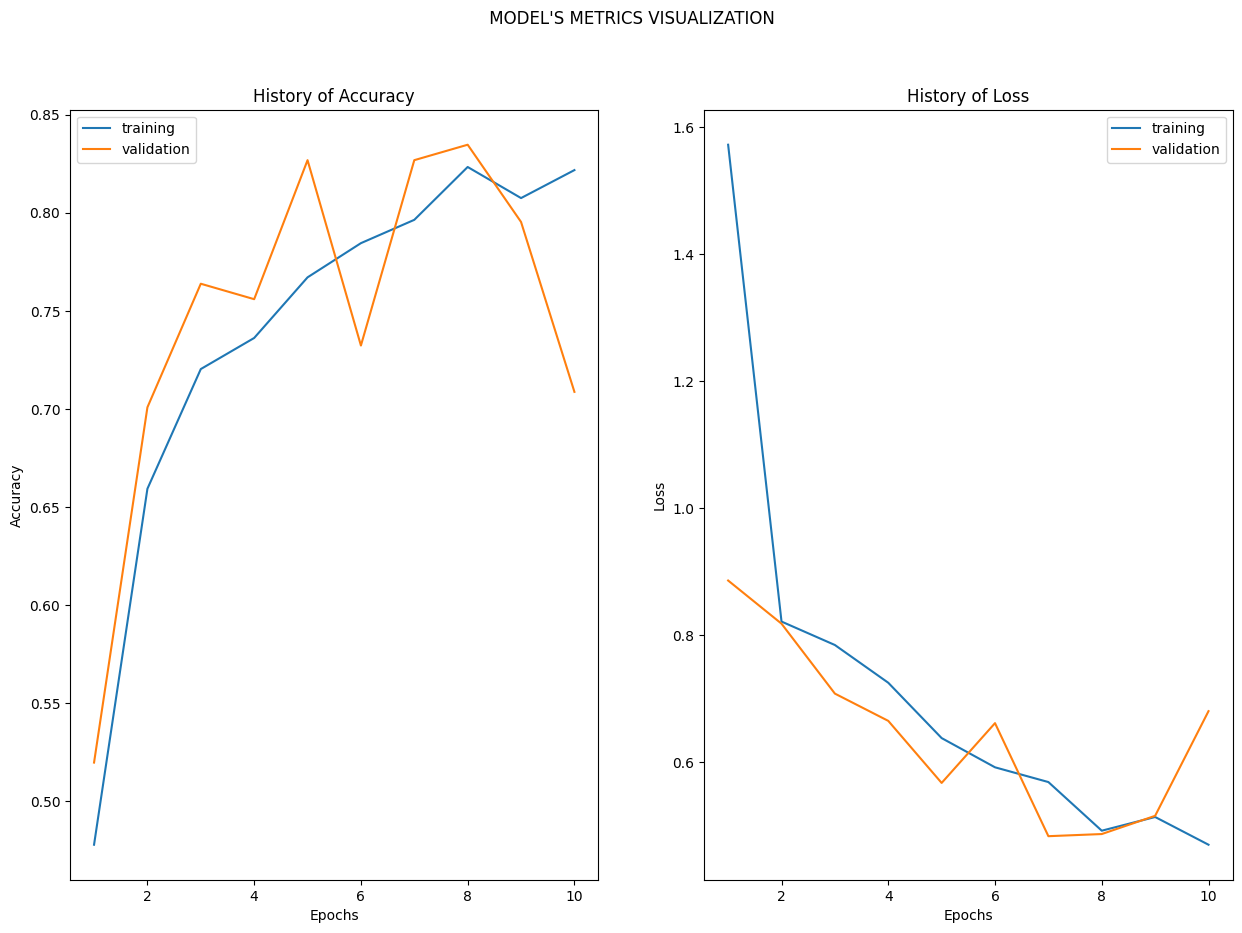

In [ ]:
# fitting of model and evaluation
model = baselineModel()
model.build(X_train.shape)
model.summary()
fit_evaluate(model,X_train,y_train,X_test,y_test,16,10,4)

As seen above, the validation and training loss have instances of good fit at around 2 to 3 epochs. From the third epoch onwards, both the validation and training loss starts to decrease until the 10 epoch. There are slight signs of underfitting after 3 epochs as the training loss is higher than the validation loss.

The accuracy of training increases significantly till the 10 epochs. For the validation accuracy, it remains constant until the 3rd epoch and increases until the 7th epoch. There is slight overfitting between the 6th and 8th epoch. After the 7th epoch, it then decreases and increases at the 9th epoch.

Both the precision and recall score are around 0.71 and 0.68 respectively which means that this baseline model's performance is good as the definition of a good model would be at least 0.70 and above. The ROC area is relatively high at around 0.79 and this means that the predictions of this baseline model are around 0.79% correct as the roc score of 1.0 would determine that the predictions are 100% correct.

The f1-measure is around 0.63 which is considered average as it indicates 'how well the model predicts each observation correctly' [11].

As it is stated that if the dataset is imbalanced, the use of 'accuracy is less useful since it gives equal weight to the model’s ability to predict all categories' [12]. Hence, the model's prediction is relatively good based on the precision, recall, f1-measure and roc score.



#7 Scaling up: developing a model that overfits

In [ ]:
# overfit model
def baselineTwoLayerModel():

    model = Sequential()

    model.add(Flatten())
    model.add(Dense(128,activation='relu', input_shape = X_train.shape))
    model.add(Dense(64,activation='relu'))
    model.add(Dense(OUTPUT_CLASSES,activation='softmax'))

    model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['acc'])

    return model

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (1262, 22500)             0         
                                                                 
 dense_16 (Dense)            (1262, 128)               2880128   
                                                                 
 dense_17 (Dense)            (1262, 64)                8256      
                                                                 
 dense_18 (Dense)            (1262, 3)                 195       
                                                                 
Total params: 2888579 (11.02 MB)
Trainable params: 2888579 (11.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/25
79/79 [==============================] - 3s 35ms/step - loss: 1.3034 - acc: 0.5531 - val_loss: 0.9023 - val_acc: 0.6063
Epoch 2/25
79/7

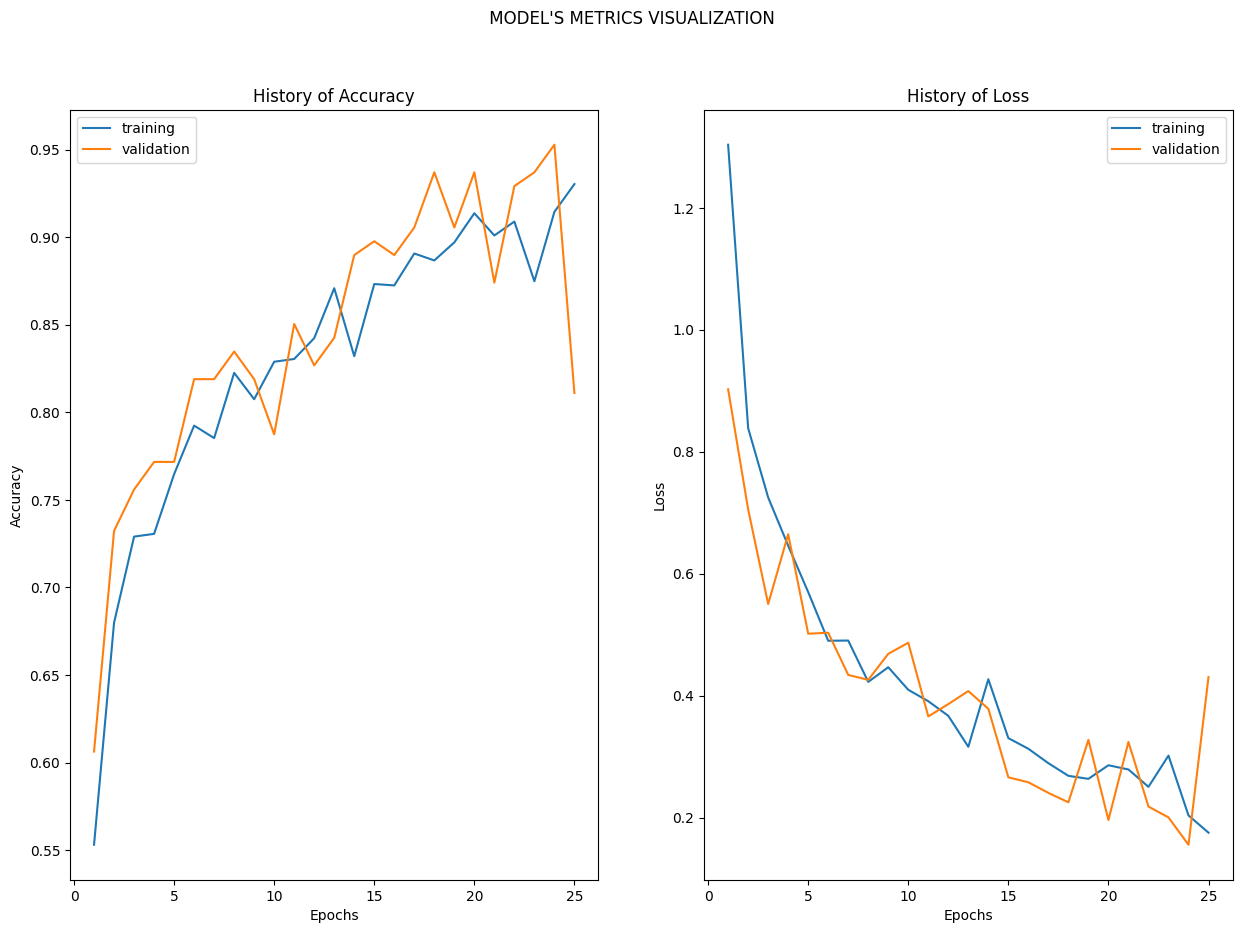

In [ ]:
# fitting of model and evaluation
model = baselineTwoLayerModel()
model.build(X_train.shape)
model.summary()
fit_evaluate(model,X_train,y_train,X_test,y_test,16,25,4)

As seen above, the validation and training loss have instances of overfitting from the graph above. Between epochs 4 to 6 , there are signs of overfitting as the validation loss is greater than the training loss. The validation loss then decreases and increases from the 6 to 8 epochs, 8 to 11 epoch, 11 to 14 epochs and 14 to 16 epochs. Between 6 to 10 epochs, there are slight instances of underfitting.

For both the training and validation accuracy, it increases significantly until the 16 epochs. There are slight overfitting at three different points in the graph and they are at the 2nd epoch, 4th epoch and 7th epochs.

Both the precision and recall score are around 0.76 and 0.75 respectively which means that the model's predictions of the positive class are good and it is good at finding all the true positives from all the actual positive samples. The ROC area is relatively high at around 0.89 and this means that the predictions of this model are around 0.89% correct as the roc score of 1.0 would determine that the predictions are 100% correct. The f1-measure is 0.74 which is considered good as it indicates 'how well the model predicts each observation correctly' [11].

As it is stated that if the dataset is imbalanced, the use of 'accuracy is less useful since it gives equal weight to the model’s ability to predict all categories' [12]. Hence, the model's prediction is relatively good based on the precision, recall, f1-measure and roc score.


#8. Regularising your model and tuning your hyperparameters

# 8.1 Adding dropout to 'deep model 1'

To regularise a model and tuning of hyperparameters, I would need to add dropout, add more layers and add L2 regularisation. Adding a dropout layer will set input units to zero with a frequency of rate at each step during training time to prevent overfitting.(Keras, no date)

In [ ]:
# deep model
def deepModel():

    model = Sequential()

    model.add(Flatten())
    model.add(Dense(128,activation='relu', input_shape = X_train.shape))
    model.add(Dropout(0.5))
    model.add(Dense(64,activation='relu', input_shape = X_train.shape))
    model.add(Dropout(0.5))
    model.add(Dense(OUTPUT_CLASSES,activation='softmax'))

    model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['acc'])
    return model


In [ ]:
# model's summary
model = deepModel()
model.build(X_train.shape)
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_12 (Flatten)        (1420, 22500)             0         
                                                                 
 dense_36 (Dense)            (1420, 128)               2880128   
                                                                 
 dropout (Dropout)           (1420, 128)               0         
                                                                 
 dense_37 (Dense)            (1420, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (1420, 64)                0         
                                                                 
 dense_38 (Dense)            (1420, 3)                 195       
                                                                 
Total params: 2888579 (11.02 MB)
Trainable params: 28

#8.2 Adding more units to make the model wider

In [ ]:
# wider model
def widerModel():

    model = Sequential()

    model.add(Flatten())
    model.add(Dense(256,activation='relu', input_shape = X_train.shape))
    model.add(Dropout(0.5))
    model.add(Dense(64,activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(OUTPUT_CLASSES,activation='softmax'))

    model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['acc'])

    return model

In [ ]:
# model's summary
model = widerModel()
model.build(X_train.shape)
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_13 (Flatten)        (1420, 22500)             0         
                                                                 
 dense_39 (Dense)            (1420, 256)               5760256   
                                                                 
 dropout_2 (Dropout)         (1420, 256)               0         
                                                                 
 dense_40 (Dense)            (1420, 64)                16448     
                                                                 
 dropout_3 (Dropout)         (1420, 64)                0         
                                                                 
 dense_41 (Dense)            (1420, 3)                 195       
                                                                 
Total params: 5776899 (22.04 MB)
Trainable params: 57

#8.3 Adding 1 dense layer with 128 units, 2 dense layers of 64 units, 1 OUTPUT_CLASSES dense layer and 3 dropout layers of 0.5 dropout rate

In [ ]:
# deeper model
def deeperModel():

    model = Sequential()

    model.add(Flatten())
    model.add(Dense(128,activation='relu', input_shape = X_train.shape))
    model.add(Dropout(0.5))
    model.add(Dense(64,activation='relu', input_shape = X_train.shape))
    model.add(Dropout(0.5))
    model.add(Dense(64,activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(OUTPUT_CLASSES,activation='softmax'))

    model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['acc'])
    print(model)
    return model

In [ ]:
# model's summary
model = deeperModel()
model.build(X_train.shape)
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_14 (Flatten)        (1420, 22500)             0         
                                                                 
 dense_42 (Dense)            (1420, 128)               2880128   
                                                                 
 dropout_4 (Dropout)         (1420, 128)               0         
                                                                 
 dense_43 (Dense)            (1420, 64)                8256      
                                                                 
 dropout_5 (Dropout)         (1420, 64)                0         
                                                                 
 dense_44 (Dense)            (1420, 64)                4160      
                                                                 
 dropout_6 (Dropout)         (1420, 64)              

#8.4 Adding Convolutional layers to model

In [ ]:
def convModel():
    model = Sequential()

    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 1)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(256, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))

    # flatten output
    model.add(Flatten())
    model.add(Dense(OUTPUT_CLASSES, activation='softmax'))

    # compile model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
    return model


In [ ]:
# model's summary
model = convModel()
model.build(X_train.shape)
model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)     

#8.5 Depthwise Separable Convolution

In [ ]:
from keras import layers
def depthConvModel():

    model = Sequential()

    # add convolutional layers
    model.add(layers.SeparableConv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 1)))
    model.add(MaxPooling2D((2, 2)))
    model.add(layers.SeparableConv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(layers.SeparableConv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(layers.SeparableConv2D(256, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))

    # flatten the output
    model.add(Flatten())
    model.add(Dense(OUTPUT_CLASSES, activation='softmax'))

    model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])
    return model

In [ ]:
# model's summary
model = depthConvModel()
model.build(X_train.shape)
model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 separable_conv2d (Separabl  (None, 148, 148, 32)      73        
 eConv2D)                                                        
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 separable_conv2d_1 (Separa  (None, 72, 72, 64)        2400      
 bleConv2D)                                                      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 separable_conv2d_2 (Separa  (None, 34, 34, 128)     

#8.6 Replacing dropout layers with L2 regularisation

In [ ]:
from keras.regularizers import l2
ALPHA = 0.001

def L2RegModel():

      model = Sequential()

      model.add(Flatten())
      model.add(BatchNormalization())
      model.add(Dense(128,activation='relu', kernel_regularizer=l2(ALPHA), input_shape = X_train.shape))
      model.add(Dense(128,activation='relu', kernel_regularizer=l2(ALPHA), input_shape = X_train.shape))
      model.add(Dense(OUTPUT_CLASSES,activation='softmax'))
      model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['acc'])

      return model

In [ ]:
# model's summary
model = L2RegModel()
model.build(X_train.shape)
model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_18 (Flatten)        (1420, 22500)             0         
                                                                 
 batch_normalization_12 (Ba  (1420, 22500)             90000     
 tchNormalization)                                               
                                                                 
 dense_51 (Dense)            (1420, 128)               2880128   
                                                                 
 dense_52 (Dense)            (1420, 128)               16512     
                                                                 
 dense_53 (Dense)            (1420, 3)                 387       
                                                                 
Total params: 2987027 (11.39 MB)
Trainable params: 2942027 (11.22 MB)
Non-trainable params: 45000 (175.78 KB)
_________

#8.7 Cross Validation

##8.7.1 K-fold Validation: Saving validation logs at each fold (deepModel)

In [ ]:
k=4
num_val_samples = len(y_train) // k
num_epochs = 120
all_mae_histories = []

for i in range(k):
    print('processing fold #', i)

    X1_train,X_val,y1_train,y_val = train_test_split(X_train,y_train,test_size=0.25,random_state=42,stratify = y_train)
    model = deepModel()
    model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['mean_absolute_error'])
    history = model.fit(X_train, y_train,validation_data=(X_val,y_val),
    epochs=num_epochs, batch_size=1, verbose=0)

    mae_history = history.history['val_mean_absolute_error']
    all_mae_histories.append(mae_history)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [ ]:
deep_average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]
deep_average_mae_history

[0.35411474853754044,
 0.3364108204841614,
 0.329144150018692,
 0.31357208639383316,
 0.30978015065193176,
 0.29963958263397217,
 0.30908748507499695,
 0.3002811297774315,
 0.30291569977998734,
 0.308799110352993,
 0.30504053086042404,
 0.2955259010195732,
 0.2954561784863472,
 0.2984617203474045,
 0.2972382977604866,
 0.2908003702759743,
 0.2960333824157715,
 0.29271214455366135,
 0.28854092210531235,
 0.3027673810720444,
 0.29335521161556244,
 0.28720735758543015,
 0.2823842763900757,
 0.28454291075468063,
 0.28406544774770737,
 0.282978855073452,
 0.283574715256691,
 0.2825430855154991,
 0.2840160205960274,
 0.2841546982526779,
 0.27518559992313385,
 0.27742499113082886,
 0.27270934730768204,
 0.2707033306360245,
 0.2748013138771057,
 0.2770492136478424,
 0.2740100175142288,
 0.27330806106328964,
 0.26705078035593033,
 0.2740901932120323,
 0.26770392060279846,
 0.27150337398052216,
 0.2701897397637367,
 0.2680548205971718,
 0.27446404099464417,
 0.26778800785541534,
 0.2639651596546

##8.7.2 K-fold Validation: Saving validation logs at each fold (deeperModel)

In [ ]:
k=4
num_epochs = 120
all_mae_histories = []

for i in range(k):
    print('processing fold #', i)

    X1_train,X_val,y1_train,y_val = train_test_split(X_train,y_train,test_size=0.25,random_state=42,stratify = y_train)
    model = deeperModel()
    model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['mean_absolute_error'])
    history = model.fit(X_train, y_train,validation_data=(X_val,y_val),
    epochs=num_epochs, batch_size=1, verbose=0)

    mae_history = history.history['val_mean_absolute_error']
    all_mae_histories.append(mae_history)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [ ]:
deeper_average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]
deeper_average_mae_history

[0.3886275142431259,
 0.3688039779663086,
 0.3637614995241165,
 0.35654815286397934,
 0.33577823638916016,
 0.32559192180633545,
 0.31831634044647217,
 0.30863674730062485,
 0.3163667544722557,
 0.3162444084882736,
 0.30862725526094437,
 0.30440007895231247,
 0.30854350328445435,
 0.2995554581284523,
 0.3049055114388466,
 0.29842184484004974,
 0.30652445554733276,
 0.3050311729311943,
 0.2961183711886406,
 0.30892007052898407,
 0.2940165027976036,
 0.29108813405036926,
 0.2930925786495209,
 0.2818886265158653,
 0.2890963479876518,
 0.29468634724617004,
 0.29139450192451477,
 0.2929016277194023,
 0.29005102068185806,
 0.28762393444776535,
 0.2856513187289238,
 0.2876078188419342,
 0.2802702784538269,
 0.2815256267786026,
 0.28743208199739456,
 0.2793147563934326,
 0.28258130699396133,
 0.2819029986858368,
 0.2760401964187622,
 0.2791879326105118,
 0.274457223713398,
 0.281633585691452,
 0.2761184722185135,
 0.27706553786993027,
 0.28561409562826157,
 0.27434083819389343,
 0.269562706351

##8.7.3 K-fold Validation: Saving validation logs at each fold (widerModel)

In [ ]:
k=4
num_epochs = 120
all_mae_histories = []

for i in range(k):
    print('processing fold #', i)

    X1_train,X_val,y1_train,y_val = train_test_split(X_train,y_train,test_size=0.25,random_state=42,stratify = y_train)
    model = widerModel()
    model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['mean_absolute_error'])
    history = model.fit(X_train, y_train,validation_data=(X_val,y_val),
    epochs=num_epochs, batch_size=1, verbose=0)

    mae_history = history.history['val_mean_absolute_error']
    all_mae_histories.append(mae_history)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [ ]:
wider_average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]
wider_average_mae_history

[0.32757672667503357,
 0.3153461292386055,
 0.3060237690806389,
 0.3050137609243393,
 0.302511528134346,
 0.29776906222105026,
 0.29950298368930817,
 0.29774540662765503,
 0.291946716606617,
 0.298523873090744,
 0.291526235640049,
 0.2846657484769821,
 0.2829348146915436,
 0.28704072535037994,
 0.28442859649658203,
 0.27873172610998154,
 0.2816903740167618,
 0.2827754020690918,
 0.2856677398085594,
 0.2877504900097847,
 0.2750098556280136,
 0.2790381982922554,
 0.27285198867321014,
 0.2676127776503563,
 0.267806738615036,
 0.26114965230226517,
 0.2602524720132351,
 0.2681838721036911,
 0.263735868036747,
 0.26093272119760513,
 0.25556934624910355,
 0.2535177543759346,
 0.24755504354834557,
 0.255666047334671,
 0.25142718106508255,
 0.2515624165534973,
 0.24503926187753677,
 0.24637411907315254,
 0.24025706201791763,
 0.2468820959329605,
 0.24363816156983376,
 0.2432713694870472,
 0.2446906566619873,
 0.24014921113848686,
 0.23754726350307465,
 0.23943399637937546,
 0.24072649329900742,

##8.7.4 K-fold Validation: Saving validation logs at each fold (convModel)

In [ ]:
k=4
num_epochs = 120
all_mae_histories = []

for i in range(k):
    print('processing fold #', i)

    X1_train,X_val,y1_train,y_val = train_test_split(X_train,y_train,test_size=0.25,random_state=42,stratify = y_train)
    model = convModel()
    model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['mean_absolute_error'])
    history = model.fit(X_train, y_train,validation_data=(X_val,y_val),
    epochs=num_epochs, batch_size=1, verbose=0)

    mae_history = history.history['val_mean_absolute_error']
    all_mae_histories.append(mae_history)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [ ]:
conv_average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]
conv_average_mae_history

[0.3413415923714638,
 0.3257366940379143,
 0.24905763939023018,
 0.23183778673410416,
 0.2290310189127922,
 0.20465926826000214,
 0.16197235509753227,
 0.15599675104022026,
 0.1423632949590683,
 0.11144335567951202,
 0.08055742550641298,
 0.09747357852756977,
 0.0762246698141098,
 0.04028521850705147,
 0.029087835922837257,
 0.033562049735337496,
 0.035447822185233235,
 0.027815034613013268,
 0.013759195455349982,
 0.008216320245992392,
 0.011033948219846934,
 0.02569997611863073,
 0.01232081581838429,
 0.02096268892637454,
 0.028161928014014848,
 0.0066445496486267075,
 0.02042333607460023,
 0.009745948677846172,
 0.012959271090949187,
 0.007643913599167718,
 0.003574946318167349,
 0.010483393271329078,
 0.006216448982058864,
 0.006503696926159819,
 0.0031484091803442027,
 0.0010681279126920629,
 4.604343883052309e-05,
 8.19857083036446e-05,
 0.02981146620908559,
 0.004395085391858178,
 0.00011221892923762855,
 3.7875553083682734e-05,
 0.017103995255500326,
 0.002149617505827539,
 0.0

##8.7.5 K-fold Validation: Saving validation logs at each fold (depthConvModel)

In [ ]:
k=4
num_epochs = 120
all_mae_histories = []

for i in range(k):
    print('processing fold #', i)
    X1_train,X_val,y1_train,y_val = train_test_split(X_train,y_train,test_size=0.25,random_state=42,stratify = y_train)
    model = depthConvModel()
    model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['mean_absolute_error'])
    history = model.fit(X_train, y_train,validation_data=(X_val,y_val),
    epochs=num_epochs, batch_size=1, verbose=0)

    mae_history = history.history['val_mean_absolute_error']
    all_mae_histories.append(mae_history)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [ ]:
depthConv_average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]
depthConv_average_mae_history

[0.3917594999074936,
 0.3793081194162369,
 0.3623153567314148,
 0.3622913286089897,
 0.36111214756965637,
 0.35857319831848145,
 0.3519101105630398,
 0.34831514954566956,
 0.35998430103063583,
 0.3434753119945526,
 0.32814913243055344,
 0.3262777030467987,
 0.3263075351715088,
 0.318633995950222,
 0.31730965711176395,
 0.31589153967797756,
 0.31221616454422474,
 0.3147405628114939,
 0.3077666386961937,
 0.3168851062655449,
 0.30150909814983606,
 0.30718933045864105,
 0.3020622134208679,
 0.3013674356043339,
 0.2951410314999521,
 0.2950783595442772,
 0.29465273302048445,
 0.31405537761747837,
 0.29381240624934435,
 0.2986287008970976,
 0.29587867902591825,
 0.2929873273242265,
 0.2943798531778157,
 0.2957383757457137,
 0.29167862178292125,
 0.2912048974831123,
 0.29834846081212163,
 0.2953721471130848,
 0.2917959475889802,
 0.29444326693192124,
 0.29433080181479454,
 0.2904348845768254,
 0.29068630712572485,
 0.2901562750521407,
 0.29074047119138413,
 0.29056258919899847,
 0.29049825853

##8.7.6 K-fold Validation: Saving validation logs at each fold (L2RegModel)

In [ ]:
k=4
num_epochs = 120
all_mae_histories = []

for i in range(k):
    print('processing fold #', i)

    X1_train,X_val,y1_train,y_val = train_test_split(X_train,y_train,test_size=0.25,random_state=42,stratify = y_train)
    model = L2RegModel()
    model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['mean_absolute_error'])
    history = model.fit(X_train, y_train,validation_data=(X_val,y_val),
    epochs=num_epochs, batch_size=1, verbose=0)

    mae_history = history.history['val_mean_absolute_error']
    all_mae_histories.append(mae_history)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [ ]:
l2Reg_average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]
l2Reg_average_mae_history

[0.4090837836265564,
 0.3956420421600342,
 0.38994744420051575,
 0.3888901472091675,
 0.38766035437583923,
 0.3872469663619995,
 0.38674870133399963,
 0.3865944743156433,
 0.38654980063438416,
 0.387306809425354,
 0.38707584142684937,
 0.386900395154953,
 0.38769617676734924,
 0.38707005977630615,
 0.38739895820617676,
 0.3864501714706421,
 0.38632872700691223,
 0.3868200480937958,
 0.3868866562843323,
 0.38794195652008057,
 0.38733258843421936,
 0.38594961166381836,
 0.3867360055446625,
 0.3869016170501709,
 0.38738206028938293,
 0.387418270111084,
 0.3871295154094696,
 0.38768014311790466,
 0.3870529234409332,
 0.3873501121997833,
 0.3865366280078888,
 0.38734185695648193,
 0.3857802748680115,
 0.38663819432258606,
 0.38781237602233887,
 0.38786983489990234,
 0.38802090287208557,
 0.3884231746196747,
 0.3876018226146698,
 0.3874276876449585,
 0.3871111273765564,
 0.3867131769657135,
 0.387493759393692,
 0.38682857155799866,
 0.3876230716705322,
 0.38739991188049316,
 0.38731864094734

#8.8 Plotting validation scores

##8.8.1 Plotting validation scores(deepModel)

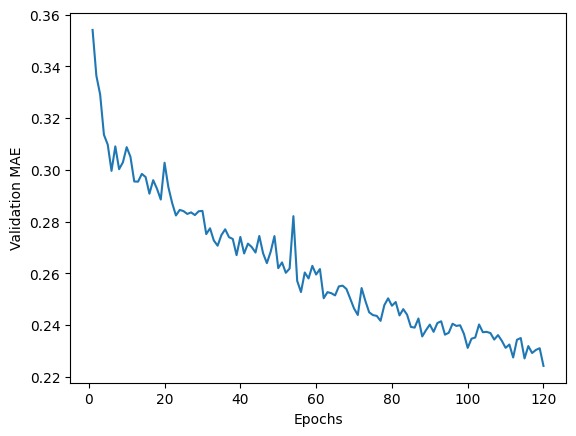

In [ ]:
plt.plot(range(1, len(deep_average_mae_history) + 1), deep_average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()


The validation MAE above for deepModel increased significantly at around 54 epochs and this would mean that it stops improving significantly after that and overfitting would occur. Hence, the most optimal number of epochs to be used to train the model would be before 54 epochs and the lowest mean absolute error before it is at around 52 epochs.


##8.8.2 Plotting validation scores(deeperModel)

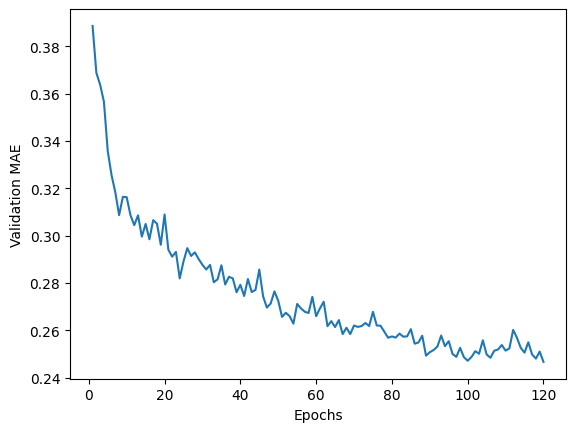

In [ ]:
plt.plot(range(1, len(deeper_average_mae_history) + 1), deeper_average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

The validation MAE above for deeperModel has the lowest mean absolute error at around 100 epochs. This would be the optimal number of epochs to be used to train the model.

##8.8.3 Plotting validation scores(widerModel)

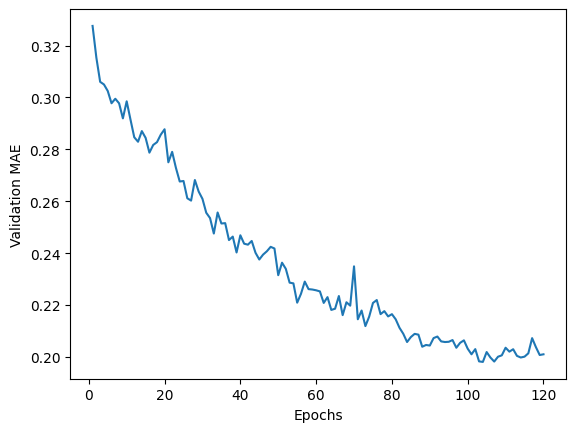

In [ ]:
plt.plot(range(1, len(wider_average_mae_history) + 1), wider_average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

The validation MAE above for widerModel increased significantly at around 70 epochs and this would mean that it stops improving significantly after that and overfitting would occur. Hence, the most optimal number of epochs to be used to train the model would be before 70 epochs and the lowest mean absolute error before it is at around 67 epochs.

##8.8.4 Plotting validation scores(convModel)




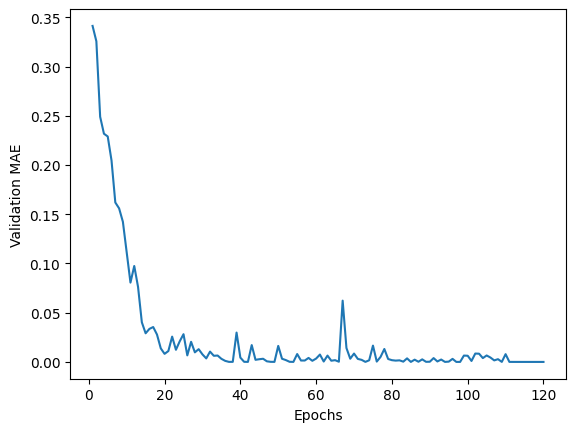

In [ ]:
plt.plot(range(1, len(conv_average_mae_history) + 1), conv_average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()


The validation MAE above for convModel increased significantly at around 20 epochs and this would mean that it stops improving significantly after that and overfitting would occur. Hence, the most optimal number of epochs to be used to train the model would be before it with the lowest mean absolute error at at around 16 epochs.

##8.8.5 Plotting validation scores(depthConvModel)

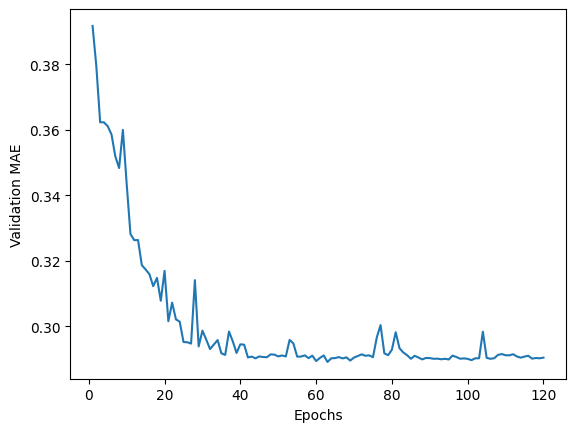

In [ ]:
plt.plot(range(1, len(depthConv_average_mae_history) + 1), depthConv_average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()


The validation MAE above for depthConvmodel would be around 43 epochs with the lowest mean absolute error. Hence, the most optimal number of epochs to be used to train the model would be 43.

##8.8.6 Plotting validation scores(L2RegModel)

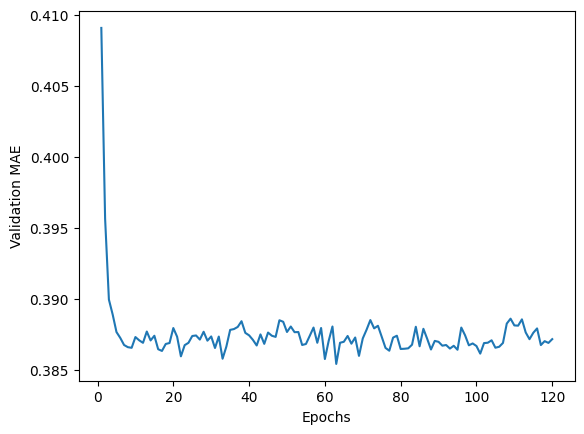

In [ ]:
plt.plot(range(1, len(l2Reg_average_mae_history) + 1), l2Reg_average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()


The validation MAE above for L2RegModel has the lowest mean absolute error at around 63 epochs. This would be the optimal number of epochs to be used to train the model.

#8.9 Evaluating model's performance

##8.9.1 deepModel's evaluation

Epoch 1/52
40/40 [==============================] - 5s 75ms/step - loss: 2.7381 - acc: 0.3788 - val_loss: 0.9747 - val_acc: 0.5118
Epoch 2/52
40/40 [==============================] - 3s 73ms/step - loss: 1.0645 - acc: 0.5040 - val_loss: 0.9436 - val_acc: 0.5748
Epoch 3/52
40/40 [==============================] - 2s 50ms/step - loss: 1.0170 - acc: 0.5372 - val_loss: 0.8985 - val_acc: 0.5906
Epoch 4/52
40/40 [==============================] - 2s 55ms/step - loss: 0.9689 - acc: 0.5571 - val_loss: 0.8887 - val_acc: 0.5669
Epoch 5/52
40/40 [==============================] - 2s 49ms/step - loss: 0.9545 - acc: 0.5555 - val_loss: 0.8752 - val_acc: 0.5906
Epoch 6/52
40/40 [==============================] - 2s 39ms/step - loss: 0.9358 - acc: 0.5594 - val_loss: 0.8523 - val_acc: 0.5669
Epoch 7/52
40/40 [==============================] - 2s 40ms/step - loss: 0.9241 - acc: 0.5571 - val_loss: 0.8446 - val_acc: 0.5827
Epoch 8/52
40/40 [==============================] - 2s 39ms/step - loss: 0.8911 - a

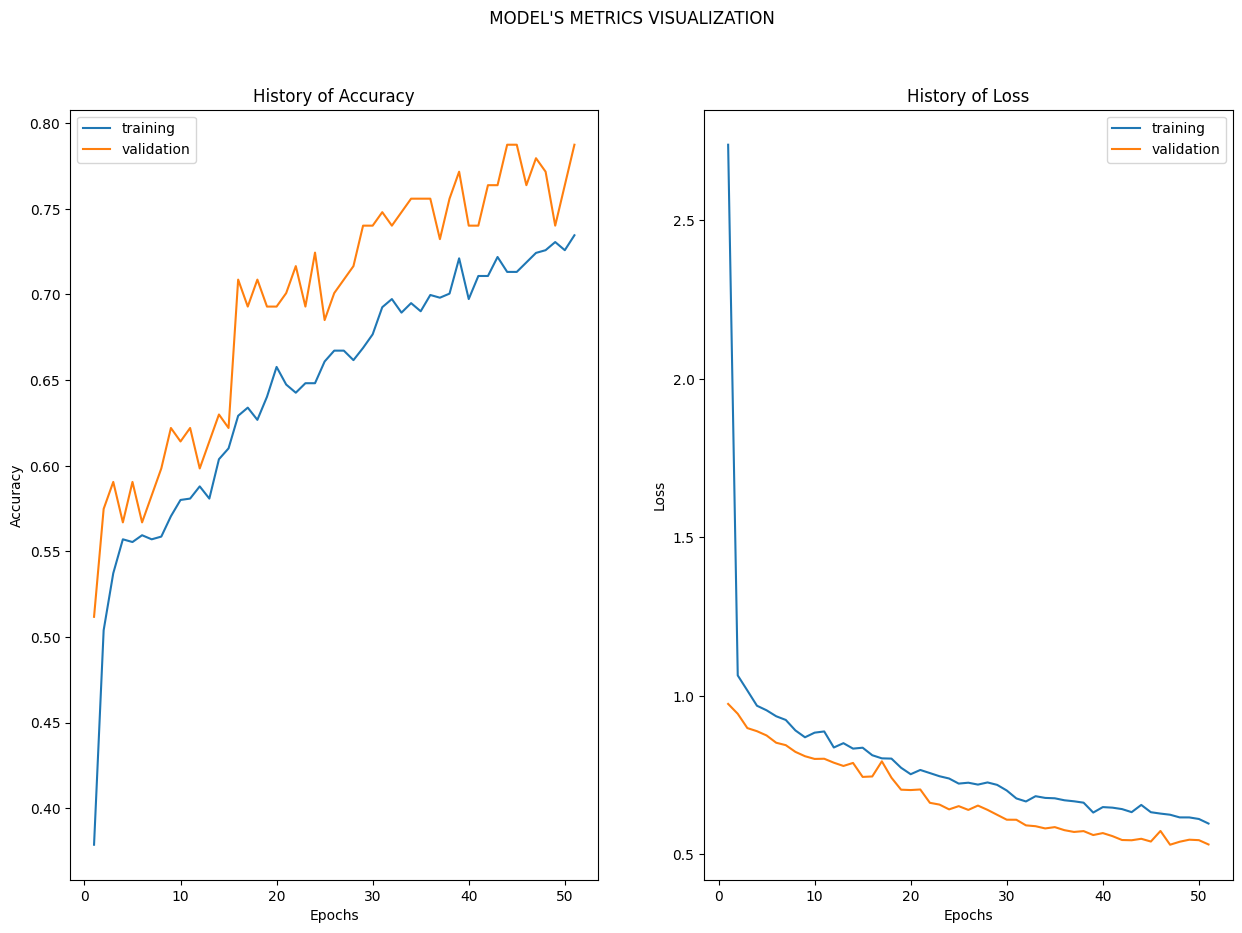

In [ ]:
model = deepModel()
fit_evaluate(model,X_train,y_train,X_test,y_test,32,52,4)

As seen above, the validation and training loss have a relatively good fit as both decreases to a point of stability at the end. However, there are also instances of the validation loss being lower than the training loss which may indicate that the validation dataset is easier to predict as compared to the training dataset.

Both the training and validation accuracy increases significantly till the 50th epochs. It is evident that the validation accuracy is higher than the training accuracy in the graph. However, the overall training accuracy and validation accuracy does not have a significant difference between them as both are around 0.78. As the early stopping callback is enabled with a patience of 4, the best epochs would be 47 epochs for deepModel.

Both the precision and recall score are around 0.70 and 0.68 respectively which means that the model's predictions of the positive class are good and it is good at finding all the true positives from all the actual positive samples. The ROC area is relatively high at around 0.77 and this means that the predictions of this model are around 0.77% correct as the roc score of 1.0 would determine that the predictions are 100% correct. The f1-measure is 0.64 which is considered average performing as it indicates 'how well the model predicts each observation correctly' [11].

Hence, the model's prediction is considered average performing based on the precision, recall, f1-measure and roc score.

##8.9.2 deeperModel's evaluation

Epoch 1/100
40/40 [==============================] - 3s 47ms/step - loss: 2.9249 - acc: 0.4271 - val_loss: 0.9372 - val_acc: 0.5748
Epoch 2/100
40/40 [==============================] - 2s 44ms/step - loss: 1.0644 - acc: 0.5238 - val_loss: 0.9508 - val_acc: 0.5433
Epoch 3/100
40/40 [==============================] - 2s 57ms/step - loss: 1.0053 - acc: 0.5372 - val_loss: 0.9051 - val_acc: 0.5669
Epoch 4/100
40/40 [==============================] - 2s 53ms/step - loss: 0.9639 - acc: 0.5475 - val_loss: 0.9018 - val_acc: 0.5433
Epoch 5/100
40/40 [==============================] - 2s 39ms/step - loss: 0.9766 - acc: 0.5444 - val_loss: 0.8947 - val_acc: 0.5669
Epoch 6/100
40/40 [==============================] - 2s 40ms/step - loss: 0.9484 - acc: 0.5523 - val_loss: 0.8934 - val_acc: 0.5669
Epoch 7/100
40/40 [==============================] - 2s 39ms/step - loss: 0.9380 - acc: 0.5452 - val_loss: 0.8917 - val_acc: 0.5591
Epoch 8/100
40/40 [==============================] - 2s 40ms/step - loss: 0.

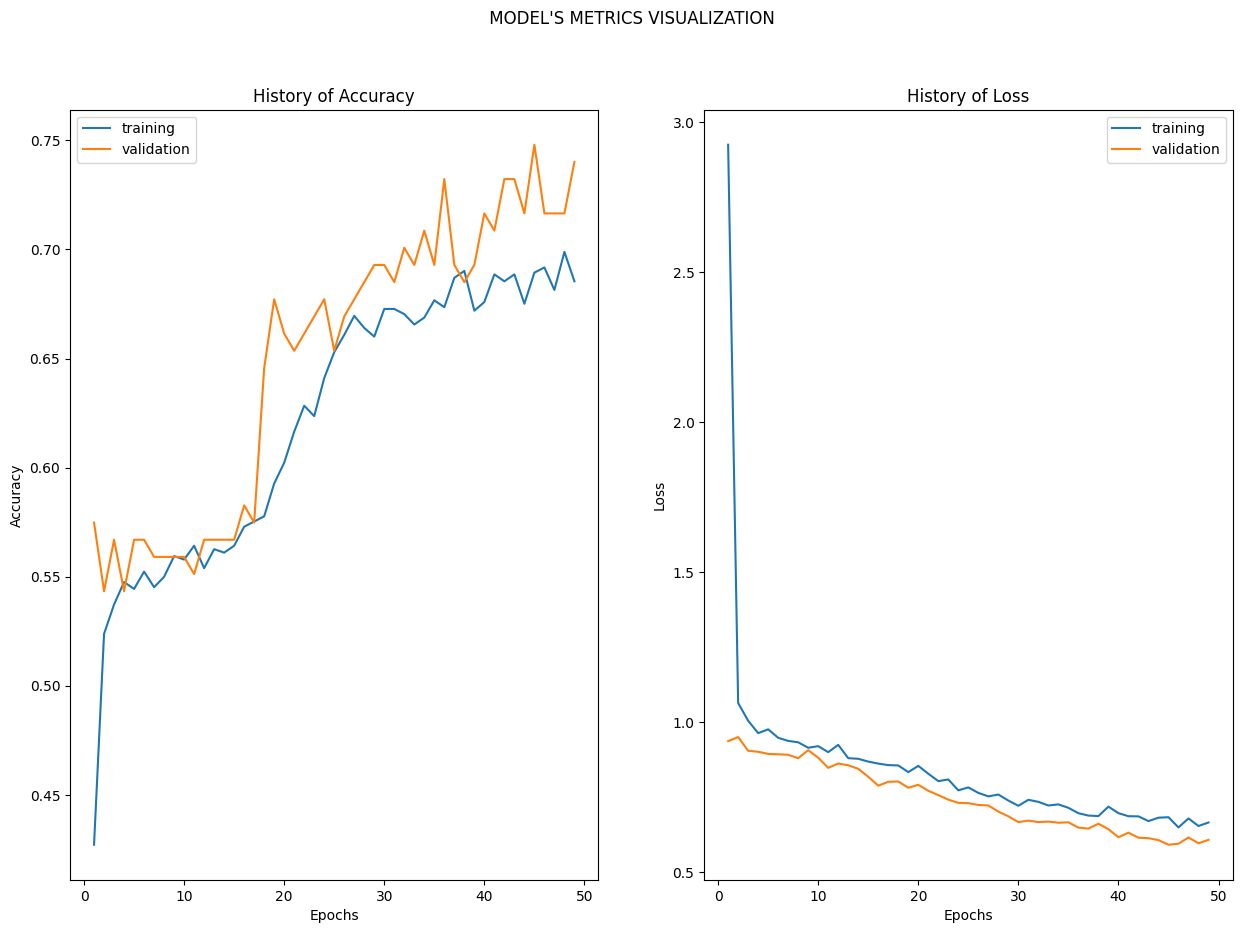

In [ ]:
model = deeperModel()
fit_evaluate(model,X_train,y_train,X_test,y_test,32,100,4)

As seen above, both the validation and training loss decreases significantly till the 45th epoch. It has a relatively good fit as both decreases to a point of stability at the end and has a small gap in between them.

Both the training and validation accuracy increases significantly till the 45th epochs. It is evident that the validation accuracy is higher than the training accuracy in the graph. However, the overall training accuracy and validation accuracy does not have a significant difference between them as both are around 0.75. As the early stopping callback is enabled with a patience of 4, the best epochs would be 45 epochs for deeperModel.

Both the precision and recall score are around 0.69 and 0.67 respectively which means that the model's predictions of the positive class are average and it is not that effective at finding all the true positives from all the actual positive samples. The ROC area, however, is relatively high at around 0.78 and this means that the predictions of this model are around 0.78% correct as the roc score of 1.0 would determine that the predictions are 100% correct. The f1-measure is 0.63 which is considered good as it indicates 'how well the model predicts each observation correctly' [11].

Hence, the model's performance is considered average performing based on the precision, recall, f1-measure and roc score.

##8.9.3 widerModel's evaluation

Epoch 1/67
40/40 [==============================] - 5s 94ms/step - loss: 3.7095 - acc: 0.3906 - val_loss: 1.0426 - val_acc: 0.5512
Epoch 2/67
40/40 [==============================] - 4s 104ms/step - loss: 1.9222 - acc: 0.4422 - val_loss: 0.9170 - val_acc: 0.4724
Epoch 3/67
40/40 [==============================] - 3s 77ms/step - loss: 1.1353 - acc: 0.4889 - val_loss: 0.8286 - val_acc: 0.6063
Epoch 4/67
40/40 [==============================] - 3s 76ms/step - loss: 1.0005 - acc: 0.5594 - val_loss: 0.8712 - val_acc: 0.5669
Epoch 5/67
40/40 [==============================] - 3s 76ms/step - loss: 0.9488 - acc: 0.5547 - val_loss: 0.8231 - val_acc: 0.5906
Epoch 6/67
40/40 [==============================] - 4s 109ms/step - loss: 0.9248 - acc: 0.5555 - val_loss: 0.7891 - val_acc: 0.6063
Epoch 7/67
40/40 [==============================] - 3s 78ms/step - loss: 0.8765 - acc: 0.5975 - val_loss: 0.7869 - val_acc: 0.6142
Epoch 8/67
40/40 [==============================] - 3s 78ms/step - loss: 0.8523 -

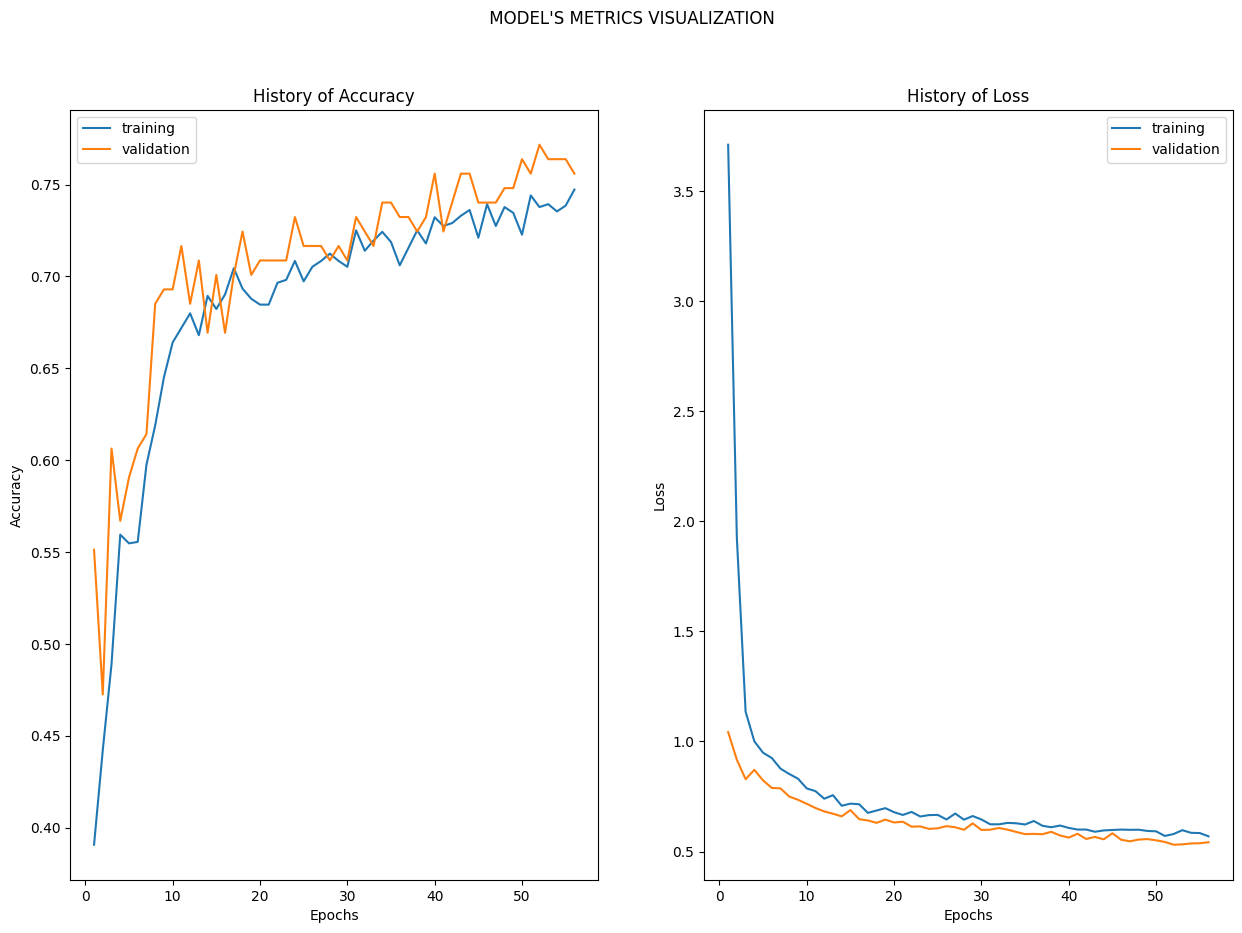

In [ ]:
model = widerModel()
fit_evaluate(model,X_train,y_train,X_test,y_test,32,67,4)

As seen above, both the validation and training loss decreases significantly till the 52nd epoch. It has a relatively good fit as both decreases to a point of stability at the end and has a small gap in between them.

Both the training and validation accuracy increases significantly till the 52nd epochs. It is evident that the validation accuracy is higher than the training accuracy in the graph. However, the overall training accuracy and validation accuracy does not have a significant difference between them as both are around 0.77. As the early stopping callback is enabled with a patience of 4, the best epochs would be 52 epochs for widerModel.

Both the precision and recall score are around 0.70 and 0.68 respectively which means that the model's predictions of the positive class are good and it is good at finding all the true positives from all the actual positive samples. The ROC area is relatively high at around 0.79 and this means that the predictions of this model are around 0.79% correct as the roc score of 1.0 would determine that the predictions are 100% correct. The f1-measure is 0.65 which is considered average as it indicates 'how well the model predicts each observation correctly' [11].

Hence, the model's performance is considered good performing based on the precision, recall, f1-measure and roc score.

##8.9.4 convModel's evaluation

Epoch 1/16
40/40 [==============================] - 67s 2s/step - loss: 0.9091 - acc: 0.5428 - val_loss: 0.8550 - val_acc: 0.6063
Epoch 2/16
40/40 [==============================] - 60s 1s/step - loss: 0.7770 - acc: 0.6751 - val_loss: 0.7439 - val_acc: 0.6850
Epoch 3/16
40/40 [==============================] - 59s 1s/step - loss: 0.7009 - acc: 0.6886 - val_loss: 0.6689 - val_acc: 0.6614
Epoch 4/16
40/40 [==============================] - 59s 1s/step - loss: 0.6328 - acc: 0.7029 - val_loss: 0.5755 - val_acc: 0.6929
Epoch 5/16
40/40 [==============================] - 59s 1s/step - loss: 0.5692 - acc: 0.7353 - val_loss: 0.5648 - val_acc: 0.7165
Epoch 6/16
40/40 [==============================] - 60s 1s/step - loss: 0.5037 - acc: 0.7678 - val_loss: 0.5583 - val_acc: 0.7402
Epoch 7/16
40/40 [==============================] - 59s 1s/step - loss: 0.4574 - acc: 0.7892 - val_loss: 0.4627 - val_acc: 0.7874
Epoch 8/16
40/40 [==============================] - 58s 1s/step - loss: 0.4582 - acc: 0.81

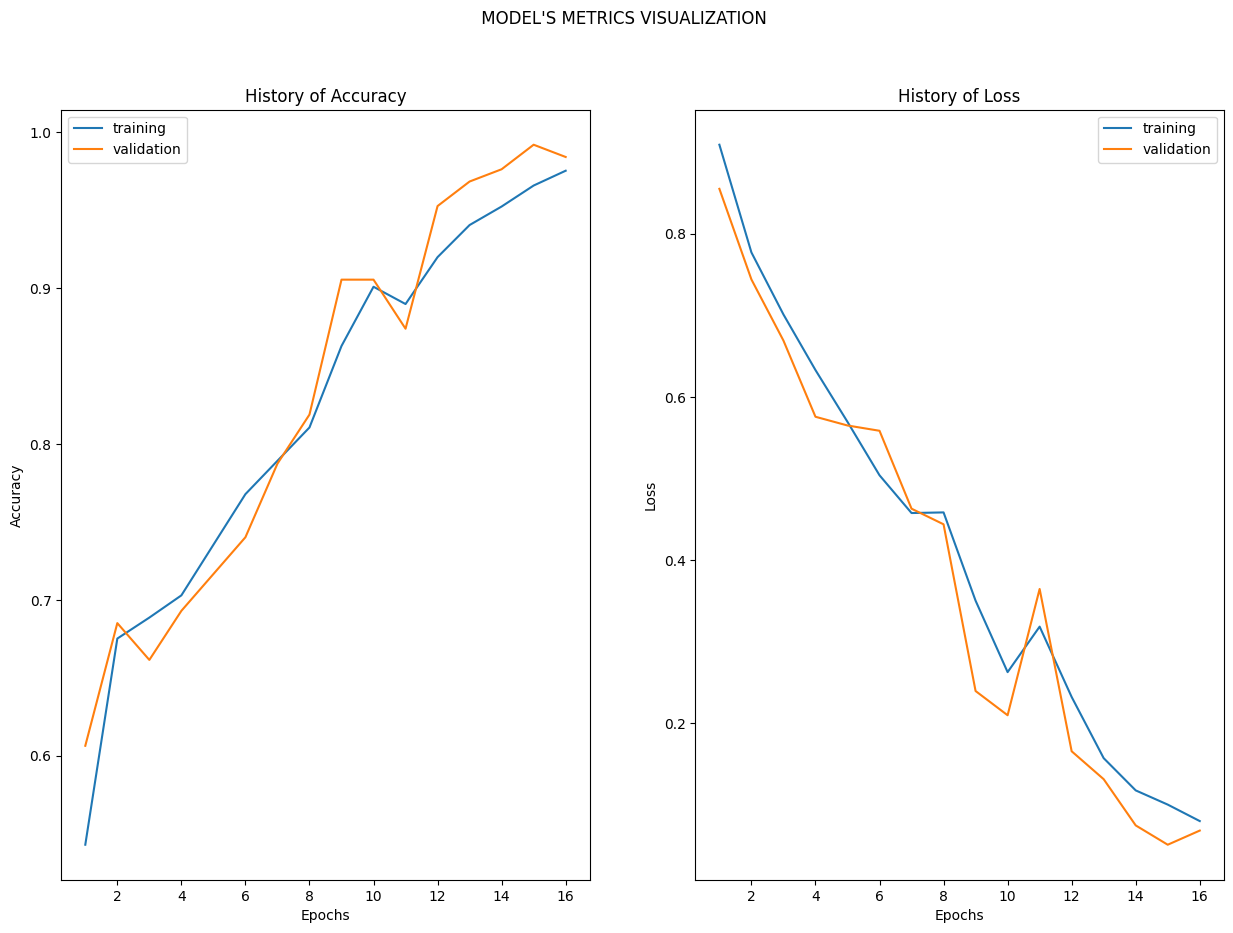

In [ ]:
model = convModel()
fit_evaluate(model,X_train,y_train,X_test,y_test,32,16,4)

As seen above, both the validation and training loss decreases significantly till the 16th epoch. There are slight signs of overfitting here at around 10 to 12 epochs.

Both the training and validation accuracy increases significantly till the 16th epochs and remains constant till the 16th epoch. The overall training accuracy and validation accuracy are at around 0.98 and 0.99.

Both the precision and recall score are around 0.85 and 0.84 respectively which means that the model's predictions of the positive class are good and it is good at finding all the true positives from all the actual positive samples. The ROC area is relatively high at around 0.92 and this means that the predictions of this model are around 0.92% correct as the roc score of 1.0 would determine that the predictions are 100% correct. The f1-measure is 0.84 which is considered good as it indicates 'how well the model predicts each observation correctly' [11].

Hence, the model's performance is considered good performing based on the precision, recall, f1-measure and roc score. However, there are signs of overfitting and the training and validation accuracy reflects that this model may not be that reliable in predicting as it is exceptionally high after a few epochs.



##8.9.5 depthConvModel's evaluation

Epoch 1/43
40/40 [==============================] - 29s 712ms/step - loss: 0.9899 - acc: 0.5563 - val_loss: 0.9720 - val_acc: 0.5669
Epoch 2/43
40/40 [==============================] - 28s 702ms/step - loss: 0.9803 - acc: 0.5642 - val_loss: 0.9794 - val_acc: 0.5669
Epoch 3/43
40/40 [==============================] - 29s 716ms/step - loss: 0.9621 - acc: 0.5563 - val_loss: 0.9612 - val_acc: 0.5669
Epoch 4/43
40/40 [==============================] - 28s 705ms/step - loss: 0.9362 - acc: 0.5586 - val_loss: 0.9438 - val_acc: 0.5591
Epoch 5/43
40/40 [==============================] - 28s 701ms/step - loss: 0.9251 - acc: 0.5650 - val_loss: 1.0228 - val_acc: 0.4173
Epoch 6/43
40/40 [==============================] - 29s 724ms/step - loss: 0.9168 - acc: 0.5634 - val_loss: 0.9344 - val_acc: 0.5748
Epoch 7/43
40/40 [==============================] - 29s 715ms/step - loss: 0.9000 - acc: 0.5697 - val_loss: 0.9275 - val_acc: 0.5512
Epoch 8/43
40/40 [==============================] - 29s 722ms/step - 

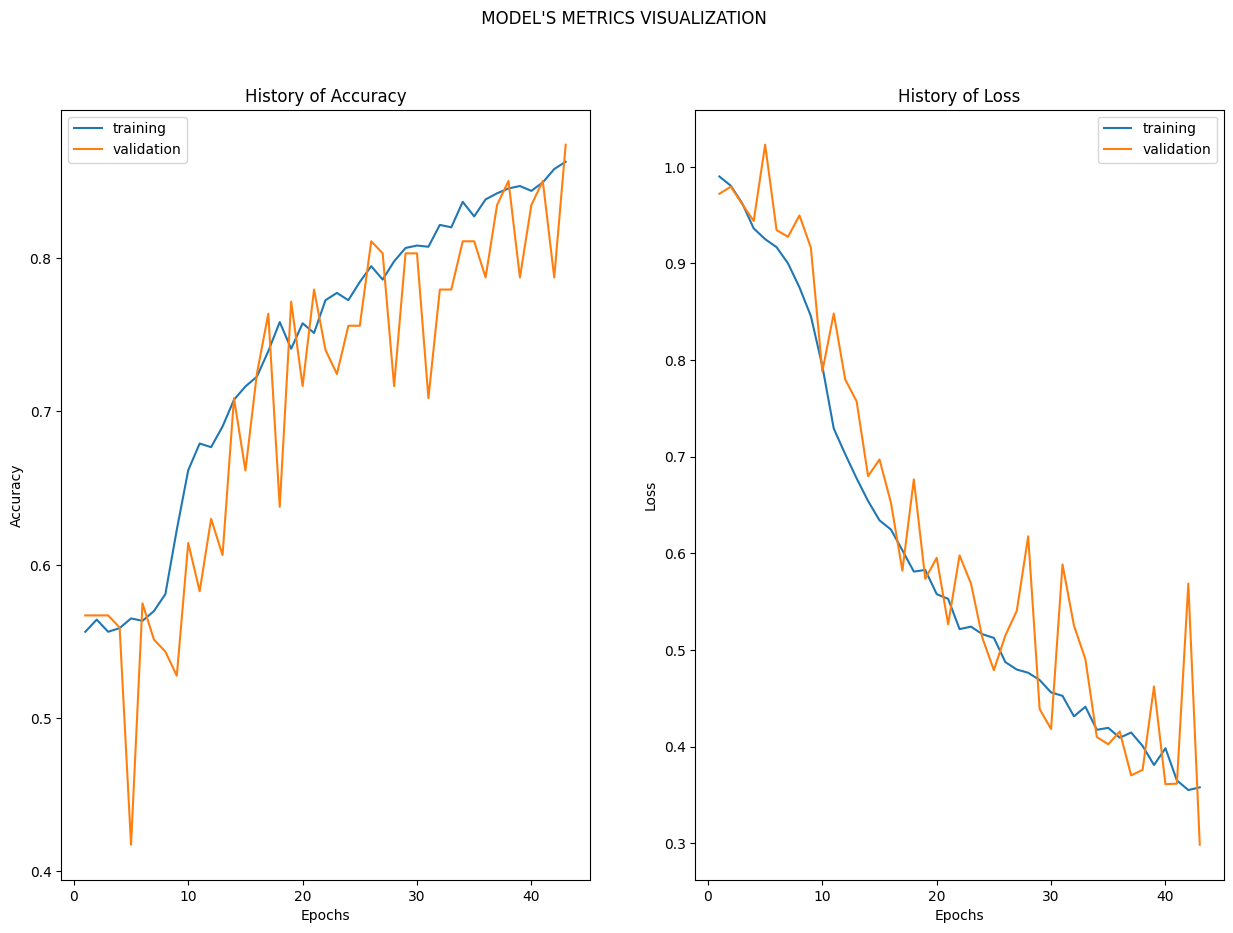

In [ ]:
model = depthConvModel()
fit_evaluate(model,X_train,y_train,X_test,y_test,32,43,4)

As seen above, both the validation and training loss decreases significantly till the 43rd epoch. There are signs of overfitting here as the validation loss is higher than the training loss.

Both the training and validation accuracy increases significantly till the 43rd epochs. The overall training accuracy and validation accuracy are at around 0.89 and 0.87 which means that there are no significant difference between them.

Both the precision and recall score are around 0.75 and around 0.76 respectively which means that the model's predictions of the positive class are good and it is good at finding all the true positives from all the actual positive samples. The ROC area is relatively high at around 0.87 and this means that the predictions of this model are around 0.87% correct as the roc score of 1.0 would determine that the predictions are 100% correct. The f1-measure is around 0.75 which is considered good as it indicates 'how well the model predicts each observation correctly' [11].

Hence, the model's performance is considered good performing based on the precision, recall, f1-measure and roc score. However, there are signs of overfitting and although the overall training and validation accuracy values are close but this model may not be that reliable in predicting as there are significant difference between the values in the graph based on each epoch.


##8.9.6 L2RegModel's evaluation

Epoch 1/63
40/40 [==============================] - 3s 56ms/step - loss: 5.2396 - acc: 0.5158 - val_loss: 1.4706 - val_acc: 0.5433
Epoch 2/63
40/40 [==============================] - 3s 71ms/step - loss: 3.0083 - acc: 0.5880 - val_loss: 1.5994 - val_acc: 0.4961
Epoch 3/63
40/40 [==============================] - 3s 63ms/step - loss: 2.7740 - acc: 0.6189 - val_loss: 1.5563 - val_acc: 0.6614
Epoch 4/63
40/40 [==============================] - 2s 51ms/step - loss: 2.4311 - acc: 0.6466 - val_loss: 1.2063 - val_acc: 0.6220
Epoch 5/63
40/40 [==============================] - 2s 49ms/step - loss: 2.6373 - acc: 0.6434 - val_loss: 1.7874 - val_acc: 0.6614
Epoch 6/63
40/40 [==============================] - 2s 50ms/step - loss: 1.6526 - acc: 0.7147 - val_loss: 1.2587 - val_acc: 0.7559
Epoch 7/63
40/40 [==============================] - 2s 51ms/step - loss: 1.6061 - acc: 0.7345 - val_loss: 1.1913 - val_acc: 0.7717
Epoch 8/63
40/40 [==============================] - 2s 59ms/step - loss: 1.5863 - a

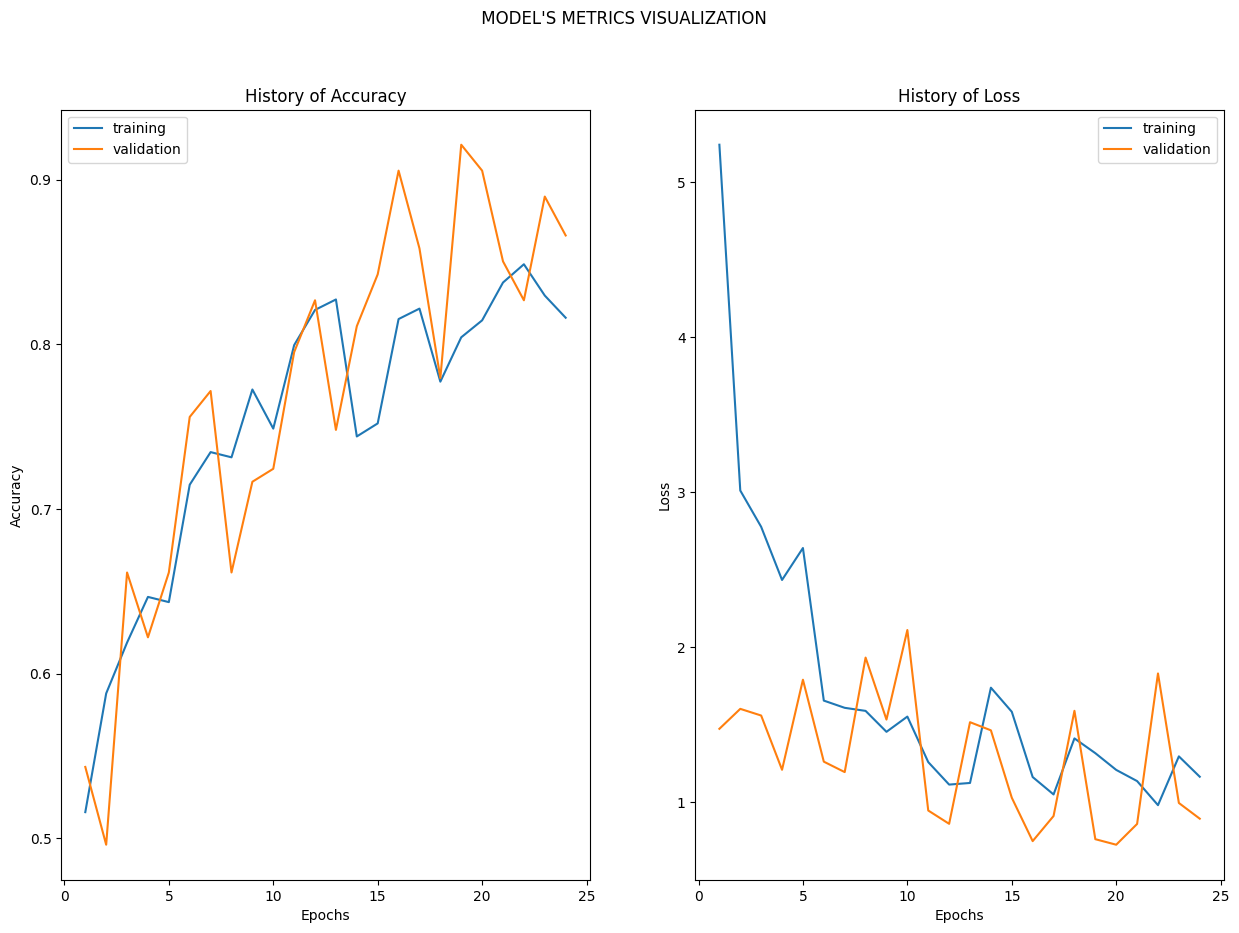

In [ ]:
model = L2RegModel()
fit_evaluate(model,X_train,y_train,X_test,y_test,32,63,4)

As seen above, both the validation and training loss decreases significantly till the 20th epoch. There are signs of overfitting here as the validation loss is higher than the training loss.

Both the training and validation accuracy increases significantly till the 20th epochs. It is evident that the validation accuracy is higher than the training accuracy in the graph after around 13 epochs. The overall training accuracy and validation accuracy are at around 0.90 and 0.91 respectively. As the early stopping callback is enabled with a patience of 4, the final best epochs would be 20 epochs for L2RegModel.

Both the precision and recall score are around 0.69 and around 0.68 respectively which means that the model's predictions of the positive class are good and it is good at finding all the true positives from all the actual positive samples. The ROC area is relatively high at around 0.82 and this means that the predictions of this model are around 0.82% correct. The f1-measure is around 0.68 which is considered average as it indicates 'how well the model predicts each observation correctly' [11].

Hence, the model's performance is considered average performing based on the precision, recall, f1-measure and roc score. However, there are signs of overfitting and although the overall training and validation accuracy values are close but this model may not be that reliable in predicting as there are significant difference between the values in the graph in each epochs.


Out of all the models, the best model would be the widerModel as there is a good fit based on the training and validation loss. The model has relatively good precision, recall, f1-measure and roc score as compared to the other models implemented which shows that it is a good performing model. There are also no signs of overfitting present in the validation and training loss.

It is also evident that the number of layers for this dataset would be around three layers, the highest number of units used in the layers should be around 256 and dropout layers with 0.5 rate is effective based on this widerModel that has been developed.

#9 Train and evaluate final production model

##9.1 Adding Batch Normalisation and remove dropout layers to compare final model (widerModel)

In [ ]:
# batchNormModel
def batchNormModel():

    model = Sequential()

    model.add(Flatten())
    model.add(BatchNormalization())
    model.add(Dense(256,activation='relu', input_shape = X_train.shape))
    model.add(Dense(64,activation='relu'))
    model.add(Dense(OUTPUT_CLASSES,activation='softmax'))

    model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['acc'])
    return model

Epoch 1/67
79/79 [==============================] - 7s 76ms/step - loss: 7.7798 - acc: 0.4905 - val_loss: 2.5551 - val_acc: 0.4684
Epoch 2/67
79/79 [==============================] - 7s 86ms/step - loss: 4.1713 - acc: 0.5602 - val_loss: 3.3026 - val_acc: 0.4684
Epoch 3/67
79/79 [==============================] - 6s 73ms/step - loss: 2.9241 - acc: 0.5777 - val_loss: 1.1052 - val_acc: 0.6076
Epoch 4/67
79/79 [==============================] - 7s 87ms/step - loss: 1.5632 - acc: 0.6197 - val_loss: 0.9058 - val_acc: 0.6329
Epoch 5/67
79/79 [==============================] - 6s 70ms/step - loss: 1.2548 - acc: 0.6553 - val_loss: 1.0252 - val_acc: 0.6930
Epoch 6/67
79/79 [==============================] - 6s 77ms/step - loss: 0.9736 - acc: 0.6933 - val_loss: 1.0183 - val_acc: 0.7215
Epoch 7/67
79/79 [==============================] - 6s 77ms/step - loss: 0.9263 - acc: 0.7029 - val_loss: 0.7168 - val_acc: 0.7310
Epoch 8/67
79/79 [==============================] - 6s 71ms/step - loss: 0.8428 - a

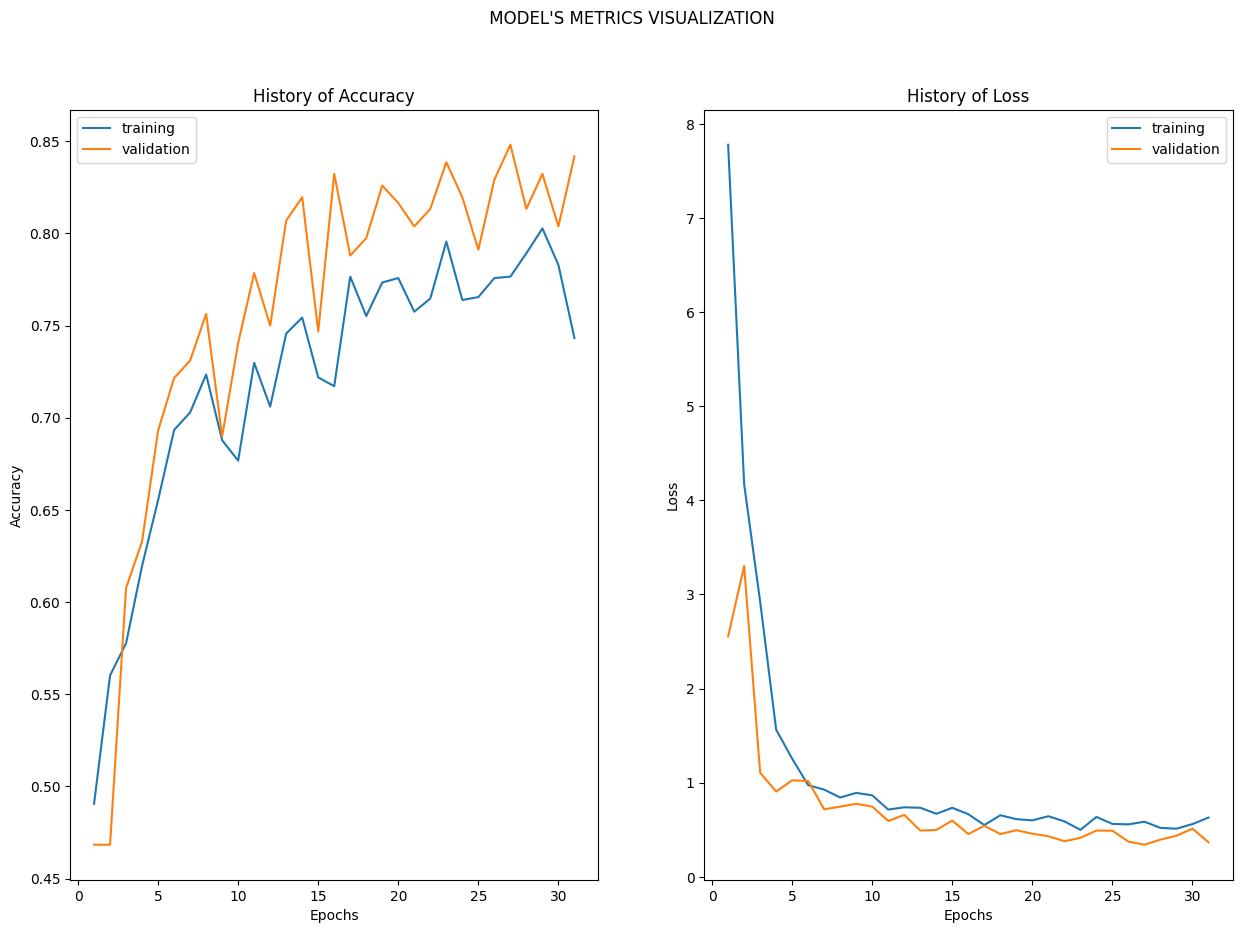

In [ ]:
model = batchNormModel()
fit_evaluate(model,X_train,y_train,X_test,y_test,16,67,4)

As seen above, both the validation and training loss decreases significantly till the 27th epoch. This model has signs of good fit as both the validation and training loss decrease and stabilize at a specific point which is around the 27th epoch.

The accuracy of training increases significantly from the 1st epoch to the 27th epoch. For the validation accuracy, it is evident that it is higher than the training accuracy after around 8 epochs. The overall training accuracy and validation accuracy does not have a significant difference between them as both are around 0.85. As the early stopping callback is enabled with a patience of 4, the final best epochs would be 27 epochs for batchNormModel.

Both the precision and recall score are around 0.67 which means that the model's predictions of the positive class are good and it is good at finding all the true positives from all the actual positive samples. The ROC area is relatively high at around 0.79 and this means that the predictions of this model are around 0.79% correct. The f1-measure is around 0.64 which is considered average as it indicates 'how well the model predicts each observation correctly' [11].

After adding batch normalisation, the precision and recall decreases by 0.03 and 0.01 respectively, the f1-measure decreases by 0.01 whilst the roc area score remains the same as compared to widerModel.

Hence, this model's performance is considered average performing based on the precision, recall, f1-measure and roc score. The results of these metrics are also not better as compared to the widerModel. There are signs of overfitting and although the overall training and validation accuracy values are close but this model may not be that reliable in predicting.


#10. Prediction

In [ ]:
model = widerModel()
name = load_preprocess_image("/content/drive/MyDrive/data/breast-cancer/Dataset_BUSI_with_GT/malignant/malignant (189).png")
name = np.expand_dims(name, axis=0)  # Add an extra dimension for batch size
detect = model.predict(name)
print(detect)
# get predicted class index
predictedClassIndex = np.argmax(detect[0])

# map predicted class index back to its original label
predictedClassLabel = label_encoder.inverse_transform([predictedClassIndex])[0]

# print predicted class label
print("Predicted Class Label:", predictedClassLabel)

1/1 [==============================] - 1s 564ms/step
[[0.31010193 0.37216672 0.31773144]]
Predicted Class Label: malignant


In [ ]:
model = widerModel()
name = load_preprocess_image("/content/drive/MyDrive/data/breast-cancer/Dataset_BUSI_with_GT/benign/benign (387).png")
name = np.expand_dims(name, axis=0)  # Add an extra dimension for batch size
detect = model.predict(name)
print(detect)
# get predicted class index
predictedClassIndex = np.argmax(detect[0])

# map predicted class index back to its original label
predictedClassLabel = label_encoder.inverse_transform([predictedClassIndex])[0]

# Print the predicted class label
print("Predicted Class Label:", predictedClassLabel)

1/1 [==============================] - 0s 354ms/step
[[0.49345973 0.33632806 0.17021215]]
Predicted Class Label: benign


In [ ]:
model = widerModel()
name = load_preprocess_image("/content/drive/MyDrive/data/breast-cancer/Dataset_BUSI_with_GT/normal/normal (88).png")
name = np.expand_dims(name, axis=0)  # Add an extra dimension for batch size
detect = model.predict(name)
print(detect)
# get predicted class index
predictedClassIndex = np.argmax(detect[0])

# map predicted class index back to its original label
predictedClassLabel = label_encoder.inverse_transform([predictedClassIndex])[0]

# print predicted class label
print("Predicted Class Label:", predictedClassLabel)

1/1 [==============================] - 0s 319ms/step
[[0.33261085 0.30650163 0.36088756]]
Predicted Class Label: normal


#11. Conclusion

In conclusion, after comparing the widerModel with the widerModel with Batch Normalisation, widerModel with L2 Regularisation, Convolutional Model, Depthwise Separable Convolution, the best model would be widerModel. This is due to the the good fit of the relationship between the training and validation loss that was monitored as compared to the rest of the other models which had signs of overfitting. The precision and recall is also relatively high at 0.70 and 0.68 respectively. The f1-measure score is good at 0.65 and the roc score is 0.79 which is very good as it means that the predictions are 0.79% correct.

This deep learning project has allowed me to develop a deep learning model as depicted above whilst allowing me to explore different algorithms and network. I have achieved the objective of developing an original model with suitable depth following the Deep Learning with Python book. My motivations for this project were also met as I gained more knowledge about the different machine learning models and image segmentation. I also hope that the implementation of this model would save more lives and reduce the workload and time of radiologists.

All in all, this project has seek to perform image segmentation and following the universal workflow of machine learning closely in order to come up with suitable evaluation protocol like K-fold validation. Finetuning and optimising of hyperparameters were also important in developing a good model, as well as the success metrics in the evaluation of the models. I have also applied the advanced techniques of Chapter 7 like the Batch Normalisation, Early Stopping callback and attempted the Depthwise Separable Convolution in this project.

#12. References

[1] PAHO. 2023. Breast Cancer. Pan American Health Organisation. Retrieved from https://www.paho.org/en/topics/breast-cancer

[2] World Health Organisation. 2021. New global breast cancer initiative highlights renewed commitment to improve survival. WHO. Retrieved from https://www.who.int/news/item/08-03-2021-new-global-breast-cancer-initiative-highlights-renewed-commitment-to-improve-survival

[3] Walid Al-Dhabyani, Mohammed Gomaa, Hussein M. Khaled, and Aly A. Fahmy. 2020. Dataset of breast ultrasound images. Data in Brief 28, (February 2020), 104863. DOI:https://doi.org/10.1016/j.dib.2019.104863

[4] Javatpoint. 2021. Precision and Recall in Machine Learning. Retrieved from https://www.javatpoint.com/precision-and-recall-in-machine-learning

[5] Sarang Narkhede. 2022. Understanding AUC - ROC Curve - Towards Data Science. Medium. Retrieved from https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5

[6] Haibo He and Yunqian Ma. 2013. Imbalanced Learning: Foundations, Algorithms, and Applications, Page 27 | IEEE eBooks | IEEE Xplore. Retrieved from https://ieeexplore.ieee.org/book/6542371

[7] Jason Brownlee. 2020. How to Calculate Precision, Recall, and F-Measure for Imbalanced Classification. MachineLearningMastery.com (August 2020). Retrieved from https://machinelearningmastery.com/precision-recall-and-f-measure-for-imbalanced-classification/

[8] Jason Brownlee. 2020. A Gentle Introduction to k-fold Cross-Validation. MachineLearningMastery.com (August 2020). Retrieved from https://machinelearningmastery.com/k-fold-cross-validation/

[9] Jaz Allibhai. 2022. Building an Ensemble Learning Model Using Scikit-learn. Medium. Retrieved from https://towardsdatascience.com/ensemble-learning-using-scikit-learn-85c4531ff86a

[10] Jaz Allibhai. 2022. Hold-out vs. Cross-validation in Machine Learning - Jaz Allibhai - Medium. Medium. Retrieved from https://medium.com/@jaz1/holdout-vs-cross-validation-in-machine-learning-7637112d3f8f

[11] Stephen Allwright. 2022. What is a good F1 score? Simply explained (2022). Stephen Allwright (December 2022). Retrieved from https://stephenallwright.com/good-f1-score/


The code in this project was with reference to these sources:
Aneeshreddyar. 2023. breast_cancer_cnn_20_epochs. Kaggle (August 2023). Retrieved from https://www.kaggle.com/code/aneeshreddyar/breast-cancer-cnn-20-epochs

Khizar Khan. 2021. Breast Cancer Detection using Resnet50. Kaggle. Retrieved from https://www.kaggle.com/code/khizarkhan/breast-cancer-detection-using-resnet50

Additionally, the code implementation in this project was also with reference to my existing project in my CM3015 Machine Learning final assignment.







#13. Appendix

1. Jason Brownlee. 2020. ROC Curves and Precision-Recall Curves for Imbalanced Classification. MachineLearningMastery.com (September 2020). Retrieved from https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-imbalanced-classification/
